## 《合成孔径雷达成像——算法与实现》中5.4方位混叠

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体 
plt.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout

In [2]:
Ta = 128;                      # 脉冲持续时间
Ka = -0.085;                   # 方位向调频率
# 参数计算
Delta_f_dop = np.abs(Ka*Ta);      # 方位信号带宽
# 参数设置
ratio = [5,0.25];           # 方位过采样率
Fa1 = ratio[0]*Delta_f_dop; # 方位采样频率PRF
N1 = int(2*np.ceil(Fa1*Ta/2));         # 方位采样点数
dt1 = Ta/N1;                   # 采样时间间隔
df1 = Fa1/N1;                  # 采样频率间隔
Fa2 = ratio[1]*Delta_f_dop; # 方位采样频率PRF
N2 = int(2*np.ceil(Fa2*Ta/2)) ;        # 方位采样点数
dt2 = Ta/N2;                   # 采样时间间隔
df2 = Fa2/N2;                  # 采样频率间隔
# 变量设置
t1 = np.arange(-Ta/2,Ta/2,dt1);       # 时间变量
t2 = np.arange(-Ta/2,Ta/2,dt2);       # 时间变量
f1 = np.arange(-Fa1/2,Fa1/2,df1);     # 频率变量
f2 = np.arange(-Fa2/2,Fa2/2,df2);     # 频率变量
# 信号表达
st1 = np.exp(1j*np.pi*Ka*t1**2);     # Chirp信号复数表达式
st2 = np.exp(1j*np.pi*Ka*t2**2);     # Chirp信号复数表达式
# 参数计算
F1 = Ka*t1/Fa2;
F2 = (Ka*t2+np.floor((Fa2/2-Ka*t2)/Fa2)*Fa2)/Fa2;



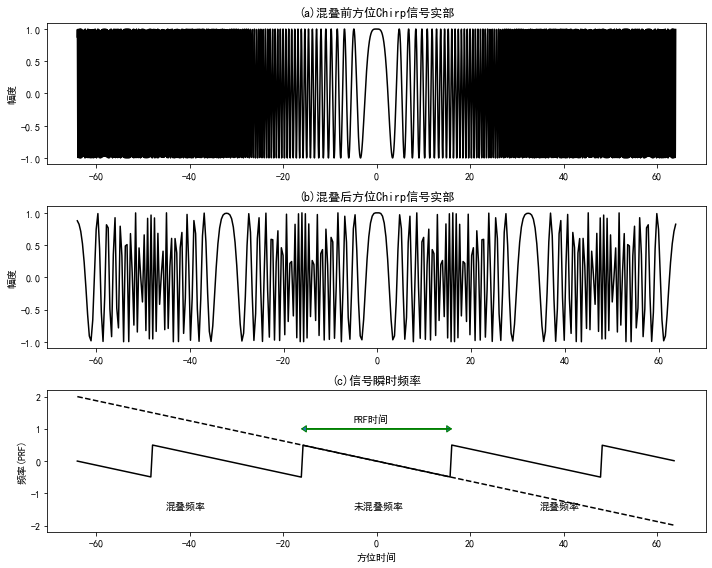

In [3]:

from matplotlib.pyplot import figure,subplot,plot,axis,title,suptitle,xlabel,ylabel,text,arrow,tight_layout
# 绘图
figure(figsize=(10,8));
subplot(311)
plot(t1,np.real(st1),'k')
# axis([-Ta/2-5,Ta/2+5,-1.2,1.2])
title('(a)混叠前方位Chirp信号实部');ylabel('幅度')
subplot(312);
plot(t2,np.real(st2),'k')
# axis([-Ta/2-5 Ta/2+5,-1.2 1.2])
title('(b)混叠后方位Chirp信号实部');ylabel('幅度')
subplot(313)
plot(t1,F1,'k--');plot(t2,F2,'k')
# axis([-Ta/2-5 Ta/2+5,-2.2 2.2])
title('(c)信号瞬时频率');xlabel('方位时间');ylabel('频率(PRF)')
arrow(-16, 1, 31, 0, width = 0.01, head_width=0.2, head_length=1, ec ='green') 
arrow(16, 1, -31, 0, width = 0.01, head_width=0.2, head_length=1, ec ='green') 

text(-5,+1.2,'PRF时间')
text(-5,-1.5,'未混叠频率')
text(-45,-1.5,'混叠频率')
text(+35,-1.5,'混叠频率')
tight_layout()

本文Python代码参照Matlab代码自：https://github.com/wanghs008/SAR-SignalProcessing